## Introduction

We have collected the data from NYC Open Data. The data is created because of public interest in how the City’s budget is being spent on salary and overtime pay for all municipal employees. That data is input into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents the following statistics for every city employee: Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (i.e. lump sum and/or retro payments). We filtered the database to focus on the data from 2023, enabling a more targeted analysis of workforce dynamics and overtime trends.

Our objective is to analyze the provided data to determine areas where job opportunities can be created based on overtime (OT) hours. For instance, if a specific field exhibits a high number of workers engaging in overtime, it suggests an increased workload in that area. Consequently, addressing this by employing more workers can not only eliminate the burden on existing staff but also generate new job opportunities. By strategically allocating resources to fields with significant OT hours, we aim to optimize workforce distribution, reduce strain on employees, and foster a healthier work environment while simultaneously fostering economic growth through increased employment opportunities.
 


## Data Summary

We collected the data from city wide payroll data from New York city open data.
Use cases:

Overtime Analysis:
Analyze patterns and trends in overtime hours and payments.
Identify job roles with significant overtime.

Attributes Used in this UseCase: Title Description, OT Hours, Total OT Paid

Data Type: Title Description: varchar, 
	       OT Hours: float
	       Total OT Paid: float

Salary Distribution Analysis:
Explore the distribution of salaries across different job titles.
Identify outliers and anomalies in salary data.

Attributes Used in this UseCase: Title Description, Regular Gross Paid

Data Type: Title Description: varchar, 
	       Regular Gross Paid : float		

Employee Demographics:
Analyze the employees experience and their Wages

Attributes: Agency Start Date, Total Other pay

Data Type: Agency Start Date: Date
	      Total Other pay: float	




## Data Summary Work

In [184]:
# Import the required libraries
# pandas Library for Data manipulation 
import pandas as pd
# PostgreSQL adapter for connecting Python with PostgresSQL
import psycopg2
from psycopg2 import sql
# SQL toolkit
import sqlalchemy
# Data visualization library
import matplotlib.pyplot as plt
# Module for handling warnings
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## Importing from Github library

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/NNikhil89/Week7MidTermProject/main/Citywide_Payroll_Data__Fiscal_Year.csv')

In [186]:
#checking the dataframe
df.head()

,AgencyId,Fiscal Year,Payroll Number,Agency Name,EmployeeId,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,1,HERRERA,JUDITH,A,06-01-1998,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,66022.0,per Annum,1442.75,52857.81,19.75,903.43,24343.23
1,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,2,MADDUX,DAVINA,P,06-01-1998,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,66022.0,per Annum,1820.00,66067.98,37.75,1438.70,25353.14
2,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,3,LYN,JOAN,A,10-05-1998,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,66022.0,per Annum,1820.00,66103.17,421.75,20542.24,16364.27
3,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,4,EKPO,EKANEM,G,07-06-1998,BROOKLYN,CHILD AND FAMILY SPECIALIST,ACTIVE,96267.0,per Annum,1820.00,96382.90,12.25,650.11,4485.78
4,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,5,SMITH,DWAYNE,NaN,12-07-1998,BROOKLYN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,ACTIVE,57947.0,per Annum,1820.00,57788.13,0.00,0.00,4341.21


### Description of Columns
Fiscal year, Payroll number, 
Agency Name(The payroll agency that the employee works for)
Agency start date( Date which employee began working for their current agency)
work location: borough of employee’s primary work location
Title description: civil service title description of the employee
Leave status as of June 30: status of employee as of the close of the relevant fiscal year: Active, ceased, or on leave, 
Base salary: assigned to the employee, pay basis (Lists whether the employee is paid on an hourly, per diem or annual basis, Regular hours: Number of hhours employee worked in the fiscal year  
Regular gross The amount paid to the employee for base salary during the fiscal year  
OT Hours: overtime hours worked by employee in one fiscal year
Total OT Paid: Total overtime pay paid to the employee in the fiscal year 
Total other pay: Includes any compensation in addition to gross salary and overtime pay, ie Differentials, lump sums, Uniform, 
allowance , meal allowance, retroactive pay increases, settlement amounts and bonus pay if applicable.'''

#### Our Dataframe comprises of below columns along with their data types

# Listing the column names and their data types

df.info()

In [188]:
#Extracting column names 
df.columns

Index(['AgencyId', 'Fiscal Year', 'Payroll Number', 'Agency Name',
       'EmployeeId', 'Last Name', 'First Name', 'Mid Init',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay'],
      dtype='object')

## Data Management using PostgreSQL

### 1. Creating a fully normalized SQL database schema
'''
CREATE TABLE IF NOT EXISTS public.agencydetails
(
    agencyid integer NOT NULL DEFAULT nextval('agencydetails_agencyid_seq'::regclass),
    "Fiscal Year" integer,
    "Payroll Number" integer,
    "Agency Name" character varying(255) COLLATE pg_catalog."default",
    "Work Location Borough" character varying(255) COLLATE pg_catalog."default",
    CONSTRAINT agencydetails_pkey PRIMARY KEY (agencyid)
)


CREATE TABLE IF NOT EXISTS public.basepaydetails
(
    basepayid integer NOT NULL DEFAULT nextval('basepaydetails_basepayid_seq'::regclass),
    employeeid integer,
    agencyid integer,
    "Base Salary" double precision,
    "Pay Basis" character varying(255) COLLATE pg_catalog."default",
    "Regular Hours" double precision,
    "Regular Gross Paid" double precision,
    "Total Other Pay" double precision,
    CONSTRAINT basepaydetails_pkey PRIMARY KEY (basepayid),
    CONSTRAINT "FK_AgencyId" FOREIGN KEY (agencyid)
        REFERENCES public.agencydetails (agencyid) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION,
    CONSTRAINT "FK_EmployeeId" FOREIGN KEY (employeeid)
        REFERENCES public.employeedetails (employeeid) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION
)

CREATE TABLE IF NOT EXISTS public.employeedetails
(
    employeeid integer NOT NULL DEFAULT nextval('employeedetails_employeeid_seq'::regclass),
    "Last Name" character varying(255) COLLATE pg_catalog."default",
    "First Name" character varying(255) COLLATE pg_catalog."default",
    "Mid Init" character varying(5) COLLATE pg_catalog."default",
    "Agency Start Date" character varying(255) COLLATE pg_catalog."default",
    "Title Description" character varying(255) COLLATE pg_catalog."default",
    CONSTRAINT employeedetails_pkey PRIMARY KEY (employeeid)
)


CREATE TABLE IF NOT EXISTS public.overtimepaydetails
(
    overtimepayid integer NOT NULL DEFAULT nextval('overtimepaydetails_overtimepayid_seq'::regclass),
    employeeid integer,
    agencyid integer,
    "OT Hours" double precision,
    "Total OT Paid" double precision,
    CONSTRAINT overtimepaydetails_pkey PRIMARY KEY (overtimepayid),
    CONSTRAINT "FK_AgencyId" FOREIGN KEY (agencyid)
        REFERENCES public.agencydetails (agencyid) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION,
    CONSTRAINT "FK_EmployeeId" FOREIGN KEY (employeeid)
        REFERENCES public.employeedetails (employeeid) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION
)'''

#### ER Diagram

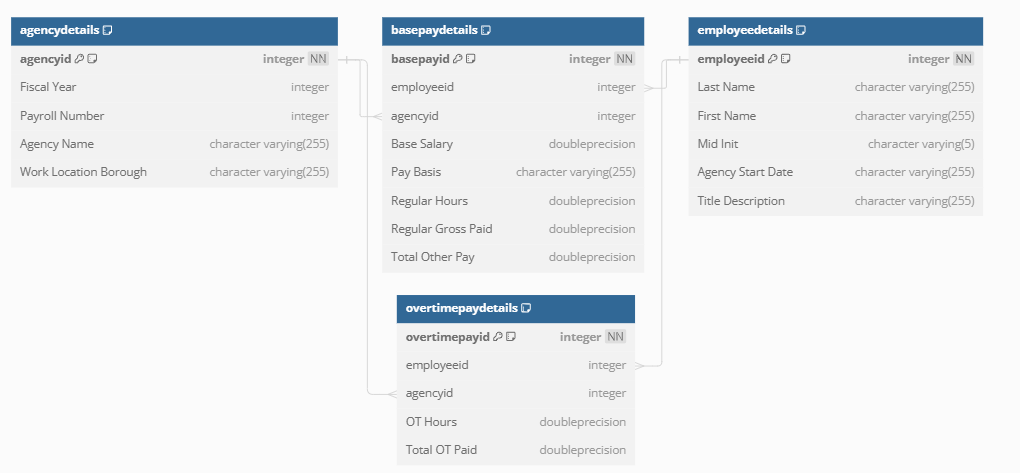


## Importing Data into Postgres Database NYCPayroll
Establishing connection between Python and Postgres

In [189]:
# Establishing a connection to a PostgreSQL database using psycopg2
# Creating a connection object using psycopg2.connect() method
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

## Loading Employee Data in NYCPayrollData Database

In [190]:
# List of column names representing employee information
lstEmployeeColumns = ['EmployeeId','Last Name','First Name', 'Mid Init', 'Agency Start Date', 'Title Description']

Inserting into employeedetails table from the created dataframe

In [193]:

# Replace 'your_table' with the actual table name
table_name = 'employeedetails'

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

cursor = conn.cursor()

# Iterate through the DataFrame rows and insert into the PostgreSQL table
for index, row in df.iterrows():
    # Create an SQL query for insertion
    insert_query = sql.SQL('INSERT INTO {} ({}) VALUES ({})').format(
        sql.Identifier(table_name),
        sql.SQL(', ').join(map(sql.Identifier, lstEmployeeColumns)),
        sql.SQL(', ').join(sql.Placeholder() * len(lstEmployeeColumns))
    )
    #print(row)
    values_list = [row[col] for col in lstEmployeeColumns]
    #print(insert_query)    
    # Execute the query
    cursor.execute(insert_query, values_list)    
    
# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()
print('Employee Data got inserted successfully')

Employee Data got inserted successfully


### Inserting Data into Basepaydetails table

In [51]:
'''List of column names representing employee information like Employee Id, Base Salary, Pay Basis, Regular Hours, 
Regular Gross Paid, Total Other Pay'''
lstBasepaydetails = ['AgencyId','EmployeeId','Leave Status as of June 30','Base Salary','Pay Basis', 'Regular Hours', 'Regular Gross Paid','Total Other Pay']

Inserting into Basepaydetails table from the created dataframe

In [53]:

# Replace 'your_table' with the actual table name
table_name = 'basepaydetails'

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

cursor = conn.cursor()

# Iterate through the DataFrame rows and insert into the PostgreSQL table
for index, row in df.iterrows():
    # Create an SQL query for insertion
    insert_query = sql.SQL('INSERT INTO {} ({}) VALUES ({})').format(
        sql.Identifier(table_name),
        sql.SQL(', ').join(map(sql.Identifier, lstBasepaydetails)),
        sql.SQL(', ').join(sql.Placeholder() * len(lstBasepaydetails))
    )

    values_list = [row[col] for col in lstBasepaydetails]
    
    _query = sql.SQL('INSERT INTO {} ({}) VALUES ({})').format(
        sql.Identifier(table_name),
        sql.SQL(', ').join(map(sql.Identifier, lstBasepaydetails)),
        sql.SQL(', ').join(sql.Placeholder() * len(lstBasepaydetails))
    )

    # Execute the query
    cursor.execute(insert_query, values_list)
    
# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()

print("Employee Basepay Data got inserted successfully")

Employee Basepay Data got inserted successfully


## Inserting into AgencyDetails table

In [12]:
# Extracting the required columns from the columns of the database
lstAgencyNames = ['AgencyId','Fiscal Year', 'Payroll Number','Agency Name', 'Work Location Borough']

Code for inserting into AgencyDetails table from Python

In [14]:
# Replace 'your_table' with the actual table name
table_name = 'agencydetails'

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

cursor = conn.cursor()

# Iterate through the DataFrame rows and insert into the PostgreSQL table
for index, row in df.iterrows():
    # Create an SQL query for insertion
    insert_query = sql.SQL('INSERT INTO {} ({}) VALUES ({})').format(
        sql.Identifier(table_name),
        sql.SQL(', ').join(map(sql.Identifier, lstAgencyNames)),
        sql.SQL(', ').join(sql.Placeholder() * len(lstAgencyNames))
    )

    values_list = [row[col] for col in lstAgencyNames]
    #print(insert_query)
    #print(values_list)
    
    # Execute the query
    cursor.execute(insert_query, values_list)    
    break;
'''As our agency dataset has records of a single agency we can put a break statement so that there is no redundant data'''    

# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()
print("Agency record created successfully")

Agency record created successfully


## Inserting into overtimepaydetails table

In [15]:
# List of column names representing employee information like OT Hours, Total OT Paid
lstovertimepaydetails = ['EmployeeId', 'AgencyId', 'OT Hours','Total OT Paid']

In [17]:
table_name = 'overtimepaydetails'


# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

cursor = conn.cursor()

# Iterate through the DataFrame rows and insert into the PostgreSQL table
for index, row in df.iterrows():
    # Create an SQL query for insertion
    insert_query = sql.SQL('INSERT INTO {} ({}) VALUES ({})').format(
        sql.Identifier(table_name),
        sql.SQL(', ').join(map(sql.Identifier, lstovertimepaydetails)),
        sql.SQL(', ').join(sql.Placeholder() * len(lstovertimepaydetails))
    )

    values_list = [row[col] for col in lstovertimepaydetails]
    #print(insert_query)
    #print(values_list)
    
    # Execute the query
    cursor.execute(insert_query, values_list)    
    
    # Execute the query
    #cursor.execute(insert_query, tuple(row))

# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()
print('Data got successfully inserted into OverTimePayDetails table')

Data got successfully inserted into OverTimePayDetails table


## Importing Data from Postgres NYCPayRoll Database into Dataframe in Python

In [58]:
# Creating a connection object using psycopg2.connect() method
conn = psycopg2.connect(
    host="localhost",
    database="NYCPayRoll",
    user="postgres",
    password="your_password")

### Importing Data from employeedetails to dfEmployees Dataframe

In [19]:
# Reading data from a PostgreSQL database table into a pandas DataFrame
# 'pd.read_sql_query()' is a pandas function used to execute a SQL query and read the results into a DataFrame.
dfEmployees = pd.read_sql_query("""SELECT * FROM "employeedetails" """, conn)


In [20]:
dfEmployees.head()

,EmployeeId,Last Name,First Name,Mid Init,Agency Start Date,Title Description
0,1,HERRERA,JUDITH,A,06-01-1998,CHILD PROTECTIVE SPECIALIST
1,2,MADDUX,DAVINA,P,06-01-1998,CHILD PROTECTIVE SPECIALIST
2,3,LYN,JOAN,A,10-05-1998,CHILD PROTECTIVE SPECIALIST
3,4,EKPO,EKANEM,G,07-06-1998,CHILD AND FAMILY SPECIALIST
4,5,SMITH,DWAYNE,NaN,12-07-1998,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR


In [119]:
dfEmployees["Agency Start Date"].value_counts()

Agency Start Date
06/23/1996    495
07/04/2011    430
08/29/2022    160
02/05/2018    150
11/21/2022    150
             ... 
05/04/2015      5
08/07/2017      5
07/24/2006      5
07/25/2016      5
09/18/2000      5
Name: count, Length: 358, dtype: int64

In [21]:
# Reading data from a PostgreSQL database table ("agencydetails") into a pandas DataFrame
# 'pd.read_sql_query()' is used to execute a SQL query and read the results into a DataFrame.
dfagencydetails = pd.read_sql_query("""SELECT * FROM "agencydetails" """, conn)

In [22]:
dfagencydetails.head()

,AgencyId,Fiscal Year,Payroll Number,Agency Name,Work Location Borough
0,SVCS,2023,67,ADMIN FOR CHILDREN'S SVCS,BROOKLYN


In [112]:
# Reading data from a PostgreSQL database table ("basepaydetails") into a pandas DataFrame
# 'pd.read_sql_query()' is utilized to execute a SQL query and read the results into a DataFrame
dfbasepaydetails = pd.read_sql_query("""SELECT * FROM "basepaydetails" """, conn)

In [113]:
dfbasepaydetails.head()

,basepayid,EmployeeId,AgencyId,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,Total Other Pay
0,1684,1,SVCS,ACTIVE,66022.0,per Annum,1442.75,52857.81,24343.23
1,1685,2,SVCS,ACTIVE,66022.0,per Annum,1820.00,66067.98,25353.14
2,1686,3,SVCS,ACTIVE,66022.0,per Annum,1820.00,66103.17,16364.27
3,1687,4,SVCS,ACTIVE,96267.0,per Annum,1820.00,96382.90,4485.78
4,1688,5,SVCS,ACTIVE,57947.0,per Annum,1820.00,57788.13,4341.21


In [26]:
# Reading data from a PostgreSQL database table ("overtimepaydetails") into a pandas DataFrame
# 'pd.read_sql_query()' is utilized to execute a SQL query and read the results into a DataFrame
dfovertimepaydetails = pd.read_sql_query("""SELECT * FROM "overtimepaydetails" """, conn)

In [27]:
dfovertimepaydetails.head()

,overtimepayid,EmployeeId,AgencyId,OT Hours,Total OT Paid
0,1,1,SVCS,19.75,903.43
1,2,2,SVCS,37.75,1438.70
2,3,3,SVCS,421.75,20542.24
3,4,4,SVCS,12.25,650.11
4,5,5,SVCS,0.00,0.00


## Exploratory Data Analysis

#### Exploring dfEmployees Dataframe

In [30]:
dfEmployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeId         1683 non-null   int64 
 1   Last Name          1683 non-null   object
 2   First Name         1683 non-null   object
 3   Mid Init           1683 non-null   object
 4   Agency Start Date  1683 non-null   object
 5   Title Description  1683 non-null   object
dtypes: int64(1), object(5)
memory usage: 79.0+ KB


#### Checking for Null values in dfEmployees

In [43]:
dfEmployees.isnull().sum()

EmployeeId           0
Last Name            0
First Name           0
Mid Init             0
Agency Start Date    0
Title Description    0
dtype: int64

#### As per the above result it seems there are no null values but Mid Init which stands for Middle Initial in Name can contain nul values we check this scenario

In [42]:
len(dfEmployees[dfEmployees["Mid Init"] == 'NaN'])
#Mid Init contains null values as shown below

431

#### Agency Start Date is date field indicating joining date of an Employee but it is given as an Object type in the dataframe we can convert this to Date type

In [44]:
dfEmployees["Agency Start Date"] = pd.to_datetime(dfEmployees["Agency Start Date"], errors='coerce')

In [46]:
dfEmployees["Agency Start Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1683 entries, 0 to 1682
Series name: Agency Start Date
Non-Null Count  Dtype         
--------------  -----         
532 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.3 KB


### EDA on dfbasepaydetails

In [114]:
dfbasepaydetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   basepayid                   1683 non-null   int64  
 1   EmployeeId                  1683 non-null   int64  
 2   AgencyId                    1683 non-null   object 
 3   Leave Status as of June 30  1683 non-null   object 
 4   Base Salary                 1683 non-null   float64
 5   Pay Basis                   1683 non-null   object 
 6   Regular Hours               1683 non-null   float64
 7   Regular Gross Paid          1683 non-null   float64
 8   Total Other Pay             1683 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 118.5+ KB


In [115]:
# Checking the number of null values in the 'Base Salary' column of the DataFrame

dfbasepaydetails.isnull().sum()

basepayid                     0
EmployeeId                    0
AgencyId                      0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
Total Other Pay               0
dtype: int64

In [116]:
dfbasepaydetails.describe()

,basepayid,EmployeeId,Base Salary,Regular Hours,Regular Gross Paid,Total Other Pay
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,2525.000000,842.000000,66183.275312,1263.983405,48038.527683,7653.888693
std,485.984568,485.984568,18214.415222,747.097908,32946.042426,8147.436186
min,1684.000000,1.000000,25.950000,-280.000000,-11343.970000,-18131.680000
25%,2104.500000,421.500000,55463.000000,560.000000,16418.430000,1966.600000
50%,2525.000000,842.000000,65559.000000,1820.000000,55514.130000,5376.850000
75%,2945.500000,1262.500000,67983.000000,1820.000000,66103.170000,12023.865000
max,3366.000000,1683.000000,177312.000000,2160.000000,163011.360000,109573.000000


In [65]:
#We see a big variation in the base salary of employees the lowest being 25.950 and the hightes being 177312

<Axes: >

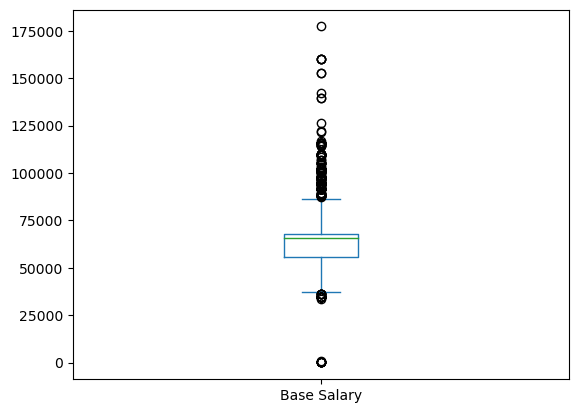

In [117]:
# Creating a box plot for the 'Base Salary' column in the DataFrame
dfbasepaydetails["Base Salary"].plot(kind = 'box')

In [66]:
#Lets see the data row corresponding to min base pay and max base pay from dfbasepaydetails 

In [118]:
dfbasepaydetails[dfbasepaydetails["Base Salary"] == 25.950]

,basepayid,EmployeeId,AgencyId,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,Total Other Pay
1437,3121,1438,SVCS,CEASED,25.95,per Hour,0.0,0.0,5864.16


In [119]:
dfbasepaydetails[dfbasepaydetails["Base Salary"] == max(dfbasepaydetails["Base Salary"])]

,basepayid,EmployeeId,AgencyId,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,Total Other Pay
1389,3073,1390,SVCS,ACTIVE,177312.0,per Annum,1820.0,163011.36,375.0


When we observe the two dataframes the differnce in values seems to be becasue of difference in Pay Basis for minimum 
we have pay per Hour and for Max we have it as per Annum so we will check for the entries for different payy basis

In [121]:
dfbasepaydetails["Pay Basis"].value_counts()

Pay Basis
per Annum    1673
per Day         6
per Hour        4
Name: count, dtype: int64

As there are more per Annum records we can convert both per Day and per Hour recors to per Annum

In [122]:
# Filtering DataFrame based on a condition
# The expression 'dfbasepaydetails["Pay Basis"] == 'per Day'' creates a boolean mask,
# where each element is True if the corresponding value in the 'Pay Basis' column is 'per Day', and False otherwise
perDayRecords = dfbasepaydetails[dfbasepaydetails["Pay Basis"] == 'per Day']
# Extracting indices from a filtered DataFrame
perDayindices = perDayRecords.index.tolist()
dfbasepaydetails.loc[perDayindices, "Base Salary"] *= 365
dfbasepaydetails.loc[perDayindices, "Pay Basis"] = 'per Annum'

In [123]:
# Filtering DataFrame based on a condition
# The expression 'dfbasepaydetails["Pay Basis"] == 'per Day'' creates a boolean mask,
# where each element is True if the corresponding value in the 'Pay Basis' column is 'per Day', and False otherwise
perHourRecords = dfbasepaydetails[dfbasepaydetails["Pay Basis"] == 'per Hour']
# Extracting indices from a filtered DataFrame
perHourindices = perHourRecords.index.tolist()
dfbasepaydetails.loc[perHourindices, "Base Salary"] *= 2920 #2920 as we have considered 8 working hrs per day so 8*365 for annum
dfbasepaydetails.loc[perHourindices, "Pay Basis"] = 'per Annum'

In [124]:
dfbasepaydetails["Pay Basis"].value_counts()

Pay Basis
per Annum    1683
Name: count, dtype: int64

In [125]:
# Generating descriptive statistics for the 'Base Salary' column
dfbasepaydetails["Base Salary"].describe()

count      1683.000000
mean      67018.298990
std       18694.284026
min       33454.000000
25%       55463.000000
50%       65605.000000
75%       69192.500000
max      205684.800000
Name: Base Salary, dtype: float64

In [128]:
# Extracting the mean value from descriptive statistics for the 'Base Salary' column
dfbasepaydetails["Base Salary"].describe()["mean"]

67018.29898989899

<Axes: >

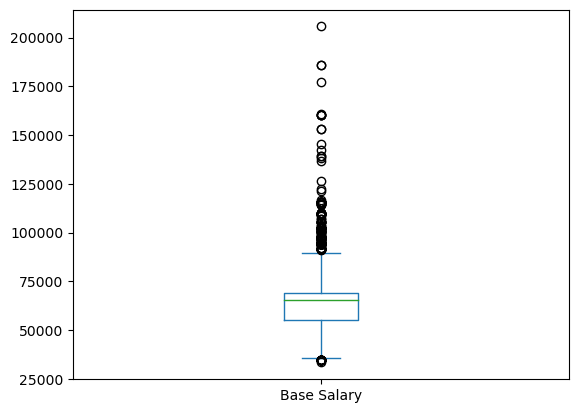

In [126]:
# Creating a box plot for the 'Base Salary' column in the DataFrame
dfbasepaydetails["Base Salary"].plot(kind = 'box')

##### EDA for Regular Gross Paid Column

In [127]:
# Generating descriptive statistics for the 'Regular Gross Paid' column
dfbasepaydetails["Regular Gross Paid"].describe()

count      1683.000000
mean      48038.527683
std       32946.042426
min      -11343.970000
25%       16418.430000
50%       55514.130000
75%       66103.170000
max      163011.360000
Name: Regular Gross Paid, dtype: float64

<Axes: >

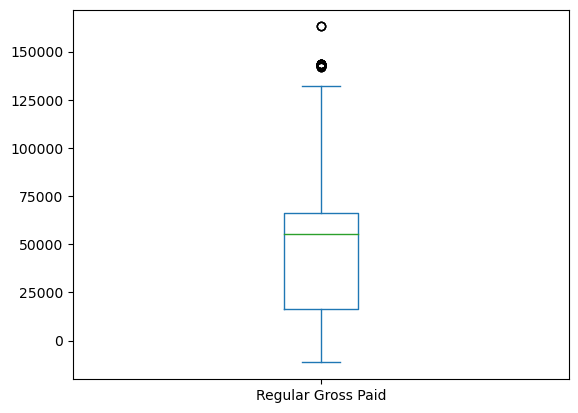

In [139]:
# Creating a box plot for the 'Regular Gross Paid' column in the DataFrame
dfbasepaydetails["Regular Gross Paid"].plot(kind = 'box')

In [132]:
# Extracting the mean value from descriptive statistics for the 'Base Salary' column
dfbasepaydetails["Base Salary"].describe()["mean"]

67018.29898989899

In [177]:
dfbasepaydetails.head()

,basepayid,EmployeeId,AgencyId,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,Total Other Pay
0,1684,1,SVCS,ACTIVE,66022.0,per Annum,1442.75,52857.81,24343.23
1,1685,2,SVCS,ACTIVE,66022.0,per Annum,1820.00,66067.98,25353.14
2,1686,3,SVCS,ACTIVE,66022.0,per Annum,1820.00,66103.17,16364.27
3,1687,4,SVCS,ACTIVE,96267.0,per Annum,1820.00,96382.90,4485.78
4,1688,5,SVCS,ACTIVE,57947.0,per Annum,1820.00,57788.13,4341.21


In [181]:
#Filtering dfEmployeesbased on employee id's in dfbasepaydetails
dfEmployees = dfEmployees[dfEmployees['EmployeeId'].isin(dfbasepaydetails['EmployeeId'])]

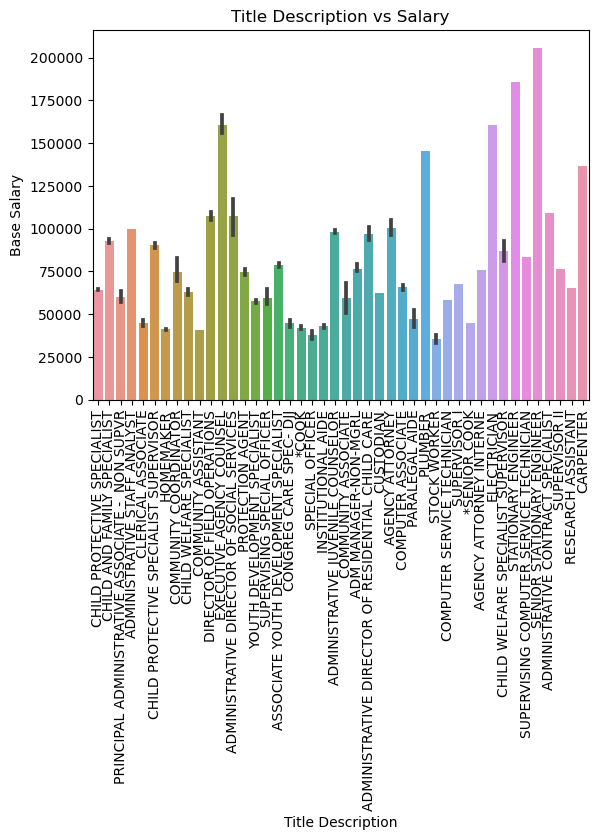

In [183]:
import seaborn as sns

dfTitleBasePay = pd.concat([dfEmployees["Title Description"], dfbasepaydetails["Base Salary"]], axis=1,sort=False)
sns.barplot (x='Title Description', y='Base Salary', data=dfTitleBasePay)
plt.xlabel('Title Description')
plt.ylabel('Base Salary')
plt.title('Title Description vs Salary')
plt.xticks(rotation=90)
plt.show()

### EDA for dfovertimepaydetails

In [134]:
# Retrieving information about the 'overtimepaydetails' DataFrame
dfovertimepaydetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   overtimepayid  1683 non-null   int64  
 1   EmployeeId     1683 non-null   int64  
 2   AgencyId       1683 non-null   object 
 3   OT Hours       1683 non-null   float64
 4   Total OT Paid  1683 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 65.9+ KB


In [135]:
dfovertimepaydetails.describe()

,overtimepayid,EmployeeId,OT Hours,Total OT Paid
count,1683.000000,1683.000000,1683.000000,1683.000000
mean,842.000000,842.000000,175.318087,8620.574480
std,485.984568,485.984568,283.315963,15178.217052
min,1.000000,1.000000,-43.750000,-1094.830000
25%,421.500000,421.500000,0.000000,0.000000
50%,842.000000,842.000000,33.250000,1377.860000
75%,1262.500000,1262.500000,230.250000,10280.875000
max,1683.000000,1683.000000,1793.250000,131478.690000


#### we got Min OT Hrs as -43 which signifies some peculairity that has to be analyzed

<Axes: >

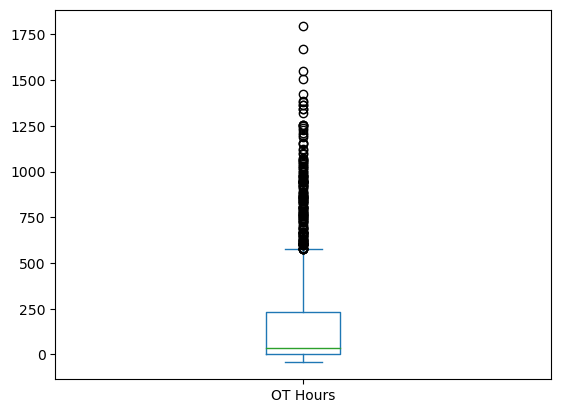

In [137]:
dfovertimepaydetails["OT Hours"].plot(kind = 'box')

As we can see there are clear outliers in Overtime Hours which signify that there are few departments which do not do overtime and few extend their hours considerably

In [143]:
minOTRecords = dfovertimepaydetails[dfovertimepaydetails["OT Hours"] == min(dfovertimepaydetails["OT Hours"])]
# Extracting indices from a filtered DataFrame
#perDayindices = perDayRecords.index.tolist()
#dfbasepaydetails.loc[perDayindices, "Base Salary"] *= 365
#dfbasepaydetails.loc[perDayindices, "Pay Basis"] = 'per Annum'
minOTRecords

,overtimepayid,EmployeeId,AgencyId,OT Hours,Total OT Paid
446,447,447,SVCS,-43.75,-1094.83


We can observe the above obtained records in dfbasepaydetails dataframe to hget more insgihts

In [149]:
#dfbasepaydetails[minOTRecords.index.tolist()]
#dfbasepaydetails[dfbasepaydetails["EmployeeId"] == minOTRecords["EmployeeId"]]
filtered_df = dfbasepaydetails[dfbasepaydetails['EmployeeId'].isin(minOTRecords['EmployeeId'])]

In [150]:
filtered_df.head()

,basepayid,EmployeeId,AgencyId,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,Total Other Pay
446,2130,447,SVCS,CEASED,34834.0,per Annum,0.0,0.0,-90.41


As we observe Leave status  of this record in CEASED so we can ignore these kind of records in our analysis

In [153]:
dfbasepaydetails = dfbasepaydetails[dfbasepaydetails['Leave Status as of June 30'] != 'CEASED']

In [156]:
dfovertimepaydetails = dfovertimepaydetails[dfovertimepaydetails['EmployeeId'].isin(dfbasepaydetails['EmployeeId'])]

In [157]:
dfovertimepaydetails.head()

,overtimepayid,EmployeeId,AgencyId,OT Hours,Total OT Paid
0,1,1,SVCS,19.75,903.43
1,2,2,SVCS,37.75,1438.70
2,3,3,SVCS,421.75,20542.24
3,4,4,SVCS,12.25,650.11
4,5,5,SVCS,0.00,0.00


In [159]:
dfovertimepaydetails.describe()

,overtimepayid,EmployeeId,OT Hours,Total OT Paid
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,821.553312,821.553312,228.589128,11321.507690
std,487.298340,487.298340,309.643666,16777.150992
min,1.000000,1.000000,-8.000000,-361.740000
25%,387.250000,387.250000,1.062500,114.077500
50%,814.500000,814.500000,92.250000,4105.905000
75%,1232.750000,1232.750000,335.250000,14952.110000
max,1682.000000,1682.000000,1793.250000,131478.690000


Even after removing the CEASED records still Minimum OT Hours is -8 a negative value which can be due to error in data so we can make these negative values as 0 as part of data cleaning

In [162]:
negativeOTHours = dfovertimepaydetails[dfovertimepaydetails['OT Hours'] < 0]
# Extracting indices from a filtered DataFrame
negativeOTindices = negativeOTHours.index.tolist()

dfovertimepaydetails.loc[negativeOTindices, "OT Hours"] = 0

#dfovertimepaydetails = dfovertimepaydetails[dfovertimepaydetails['OT Hours'] < 0]

In [163]:
len(dfovertimepaydetails[dfovertimepaydetails['OT Hours'] < 0])

0

In [164]:
dfovertimepaydetails.describe()

,overtimepayid,EmployeeId,OT Hours,Total OT Paid
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,821.553312,821.553312,228.595590,11321.507690
std,487.298340,487.298340,309.638808,16777.150992
min,1.000000,1.000000,0.000000,-361.740000
25%,387.250000,387.250000,1.062500,114.077500
50%,814.500000,814.500000,92.250000,4105.905000
75%,1232.750000,1232.750000,335.250000,14952.110000
max,1682.000000,1682.000000,1793.250000,131478.690000


Similarly updatimng the Total OT paid to zero for negative OT Hours records

In [166]:
dfovertimepaydetails.loc[negativeOTindices, "Total OT Paid"] = 0

In [167]:
dfovertimepaydetails.describe()

,overtimepayid,EmployeeId,OT Hours,Total OT Paid
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,821.553312,821.553312,228.595590,11321.507690
std,487.298340,487.298340,309.638808,16777.150992
min,1.000000,1.000000,0.000000,-361.740000
25%,387.250000,387.250000,1.062500,114.077500
50%,814.500000,814.500000,92.250000,4105.905000
75%,1232.750000,1232.750000,335.250000,14952.110000
max,1682.000000,1682.000000,1793.250000,131478.690000


<Axes: >

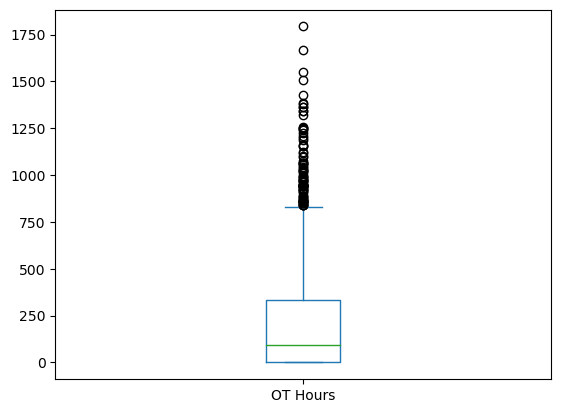

In [168]:
dfovertimepaydetails["OT Hours"].plot(kind='box')

<Axes: >

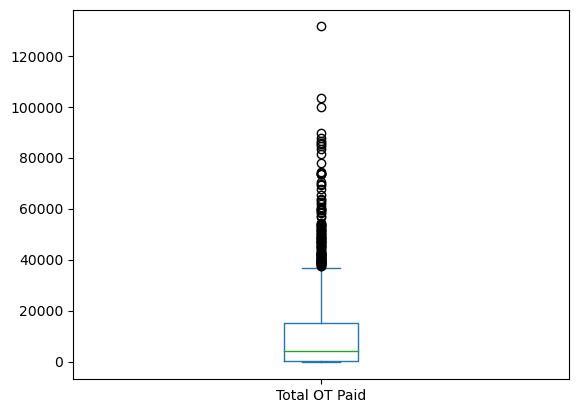

In [169]:
dfovertimepaydetails["Total OT Paid"].plot(kind='box')

## Conclusion from EDA: 
From EDA we got to analyze that the data is not perfect and it needs to be cleansed.
We have performed follwing data cleaning on the given dataset:
1.Converted the Agency Start Date to DateTime format
2.Scaled the Base Pay so that it indicates the amount paid per annum instead of per Hour or per Day.
3.Removed the CEASED data from "Leave Status as of June 30" as the Employees left the organization and the Base pay and other column values for OverTime fields were given as negative
4.Updated the negative values present in OT Hours and Total OT Paid columns to 0

## Inference

In [171]:
'''For Analyzing Maximum OT Hours performed by various Job Titles we consider OT Hours as 500 '''
OTMorethan500 = dfovertimepaydetails[dfovertimepaydetails ['OT Hours']>500]
# 'condition' stores the filtered DataFrame based on the specified condition
indicesforOTMorethan500 = OTMorethan500.index.tolist()

dfOverTime = pd.concat([dfovertimepaydetails.loc[indicesforOTMorethan500, "EmployeeId"], 
                        dfEmployees.loc[indicesforOTMorethan500, "Title Description"], 
                        dfovertimepaydetails.loc[indicesforOTMorethan500, "OT Hours"]], axis=1, sort=False)

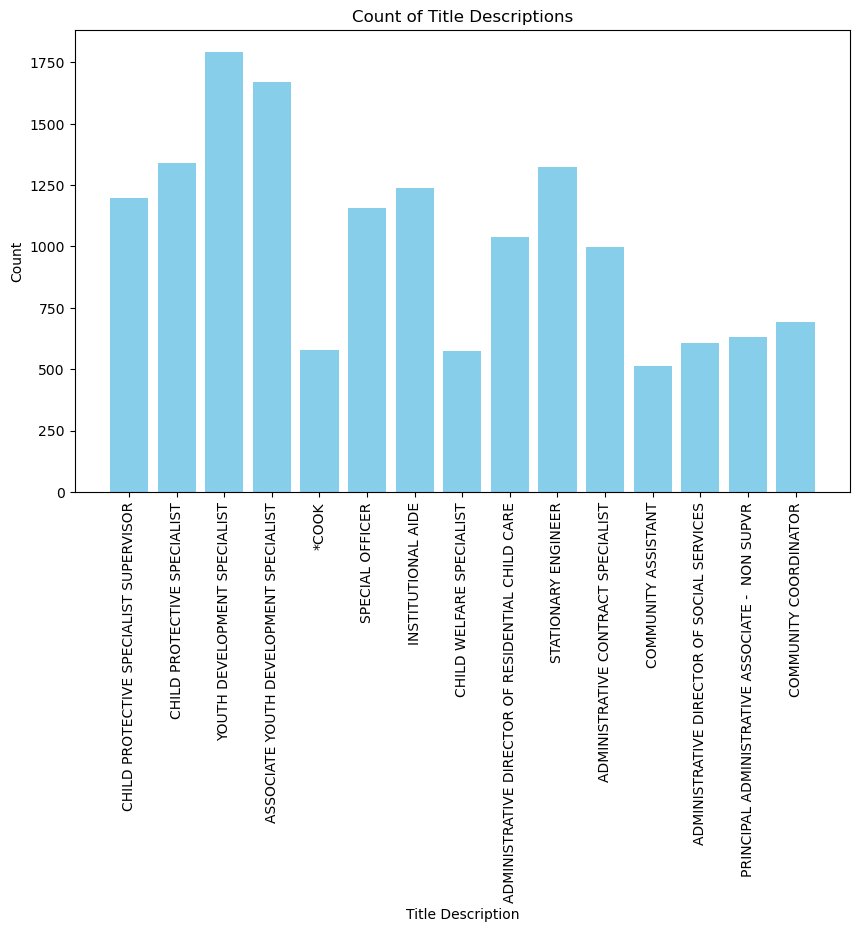

In [172]:
plt.figure(figsize=(10, 6))
plt.bar(dfOverTime['Title Description'], dfOverTime['OT Hours'], color='skyblue')
plt.xlabel('Title Description')
plt.ylabel('Count')
plt.title('Count of Title Descriptions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

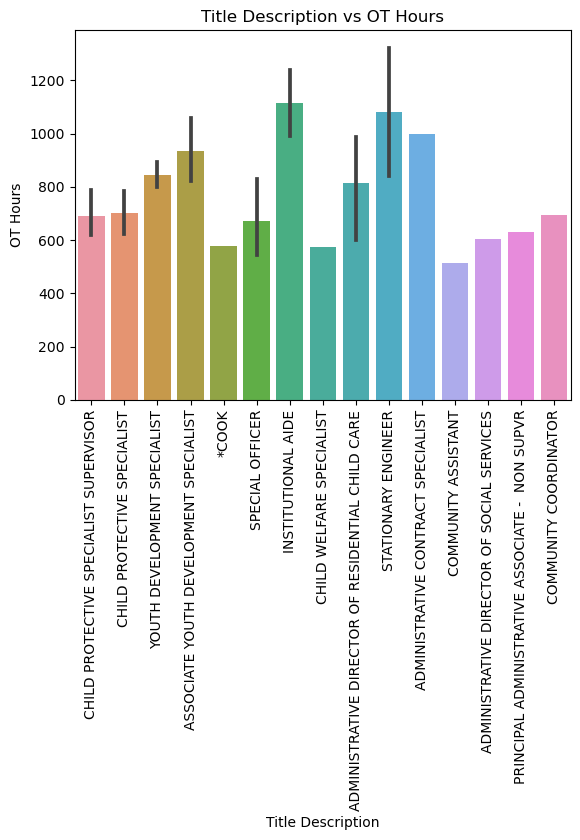

In [174]:
sns.barplot (x='Title Description', y='OT Hours', data=dfOverTime)
plt.xlabel('Title Description')
plt.ylabel('OT Hours')
plt.title('Title Description vs OT Hours')
plt.xticks(rotation=90)
plt.show()

In [175]:
dfOverTime["Title Description"].value_counts()

Title Description
YOUTH DEVELOPMENT SPECIALIST                         116
CHILD PROTECTIVE SPECIALIST                           28
ASSOCIATE YOUTH DEVELOPMENT SPECIALIST                25
CHILD PROTECTIVE SPECIALIST SUPERVISOR                15
SPECIAL OFFICER                                        8
ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE      4
INSTITUTIONAL AIDE                                     2
STATIONARY ENGINEER                                    2
*COOK                                                  1
CHILD WELFARE SPECIALIST                               1
ADMINISTRATIVE CONTRACT SPECIALIST                     1
COMMUNITY ASSISTANT                                    1
ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES             1
PRINCIPAL ADMINISTRATIVE ASSOCIATE -  NON SUPVR        1
COMMUNITY COORDINATOR                                  1
Name: count, dtype: int64

A new DataFrame is created and named dfOverTime by concatenating three columns:

'EmployeeId' from the dfovertimepaydetails DataFrame,'Title Description' from the dfEmployees DataFrame, 'OT Hours' from the dfovertimepaydetails DataFrame, all are selected based on the filtered indices.
The pd.concat function is used for concatenation. The axis=1 argument indicates concatenation along columns, and sort=False avoids sorting the columns in the result.

This code is selecting overtime records where the 'OT Hours' are greater than 500, extracting the corresponding indices, and creating a new DataFrame (dfOverTime) by combining selected columns from different DataFrames based on those indices. This approach is efficient when you want to filter and combine specific information from multiple DataFrames. 

The code sets the size of the figure to 10 inches in width and 6 inches in height. It ensures that the resulting plot will have the specified dimensions.
plt.bar() creates a bar plot using the 'Title Description' column as the x-axis values and the 'OT Hours' column as the corresponding y-axis values. Each bar represents a different job title, and the height of the bar corresponds to the count of overtime hours for that job title. The bars are colored in sky blue.
plt.xlabel(), plt.ylabel(), plt.title() set the labels for the x-axis ('Title Description') and y-axis ('Count'), and provide a title for the plot ('Count of Title Descriptions'). These labels help in understanding the content of the plot.
Aftere, Seaborn's barplot function to create a bar plot. It specifies 'Title Description' as the x-axis values (x), 'OT Hours' as the y-axis values (y), and the data source as the DataFrame dfOverTime. Then it sets the x-axis label ('Title Description'), y-axis label ('OT Hours'), and the title of the plot ('Title Description vs OT Hours'). 
By using "plt.xticks(rotation=90)" line rotates the x-axis labels (job titles in this case) by 90 degrees.

## Conclusion

We have collected the data from NYC Open Data.
And imported several Python libraries for data manipulation, PostgreSQL database connection, SQL toolkit, data visualization, fetched data from a CSV file hosted on GitHub using pandas and stores it in a DataFrame (df). Then created a schema adheres to normalization principles by organizing data into separate tables and establishing relationships between them, minimizing data redundancy.
Inserting into employeedetails, Basepaydetails, Basepaydetails tables from the created dataframe. 

Performing the the Exploratory Data Analysis and the results and conclusions for the analysis is as follows :
The code  dfbasepaydetails["-----"].plot(kind='box') generates a box plot for the "Base Salary", "Regular Gross Paid", "OT Hours"  in the DataFrames where the box plot provides a visual summary of the central tendency, spread, and potential outliers in the specified columns of the specific dataframes. 

These statistics provide a comprehensive overview of the distribution and central tendency of the "Base Salary" data, helping you understand its range, variability, and position within the dataset. The quartiles and median offer insights into the data's distribution, and the minimum and maximum values indicate the overall range of salaries. 
The resulting plot is a bar chart where each bar represents a different job title ('Title Description'), and the height of the bar indicates the count of overtime hours ('OT Hours') for that specific title. This visualization provides insights into the distribution of overtime hours across different job titles. Adjustments can be made to the code and plot appearance based on your specific preferences and data visualization requirements.

Therefore from the above visualizations and statistics, we can conclude that for the below job tile descriptions, employees are doing most of the OT hours in sectors like YOUTH DEVELOPMENT SPECIALIST, CHILD PROTECTIVE SPECIALIST, ASSOCIATE YOUTH DEVELOPMENT SPECIALIST,CHILD PROTECTIVE SPECIALIST SUPERVISOR and most of the employment can be generated here. For these Title descriptions, we can hire more employees. For the other Title descriptions like SPECIAL OFFICER, ADMINISTRATIVE DIRECTOR OF RESIDENTIAL CHILD CARE, INSTITUTIONAL AIDE, STATIONARY ENGINEER are the people doing less OT hours and moderate employment can be generated here. 